In [1]:
!pip3 install requests
!pip3 install Pillow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
import requests as r

In [3]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [4]:
resp.status_code

200

In [5]:
raw_data = resp.json()


In [6]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [7]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [8]:
final_data.insert(0, ['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'])
final_data

[['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],


In [9]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [10]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

In [11]:
final_data

[['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2

In [12]:
import datetime as dt

In [13]:
import csv

In [14]:
with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)


In [15]:
for i in range(1, len(final_data)):
    final_data[i][DATA]= dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')
final_data

[['Confirmados', 'Obitos', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

In [16]:
def getDataset(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data' : y[i] 
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data' : y
            }
        ]

In [17]:
def set_title(title= ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return{
        'title' : title,
        'display': display
    }

In [18]:
def create_chart(x, y, labels, kind = 'bar', title = ''):
    datasets = getDataset(y,labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options' : options
    }
    return chart

In [19]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [20]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)


In [21]:
from PIL import Image
from IPython.display import display

In [22]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

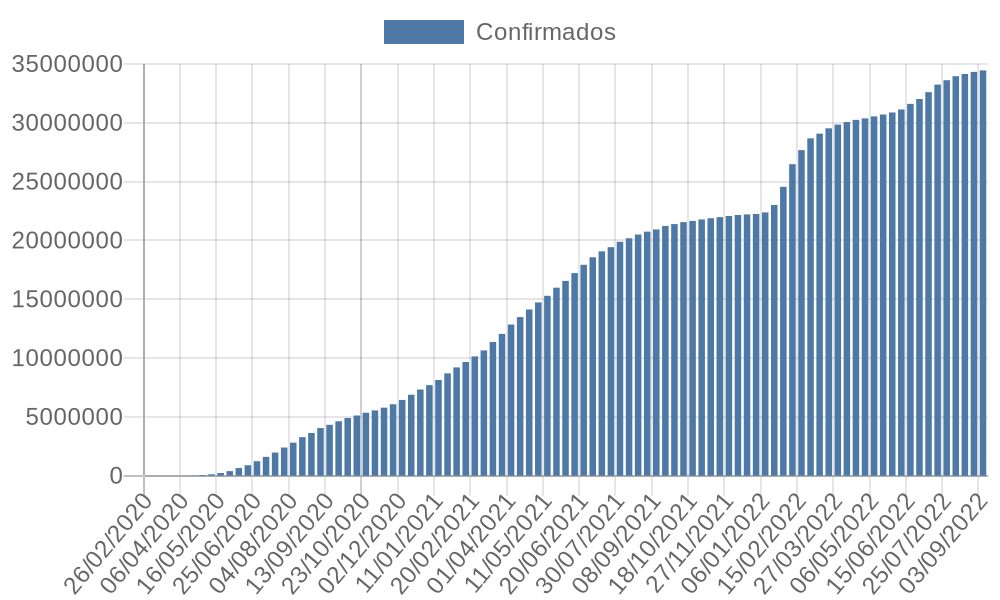

In [23]:
y_data1 = []
for obs in final_data[1::10]:
    y_data1.append(obs[CONFIRMADOS])
    

labels = ['Confirmados']

x = []
for obs in final_data[1::10]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))
    
chart = create_chart(x, [y_data1], labels, title = 'Grafico Infectados Covid')
chart_content = get_api_chart(chart)
save_image('Grafico_covid.png', chart_content)
display_image('Grafico_covid.png')

In [24]:
from urllib.parse import quote

In [25]:
def get_api_qrcode(link):
    texto = quote(link)
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={texto}')
    return resp.content